Import needed libraries

In [30]:
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

Import dataset

In [31]:
data = pd.read_csv("total-deaths-covid-19.csv")
data_consolidated = pd.read_csv("MLDataWithIndia.csv")

**** Project goal ****

1. Analyzed COVID-19 trends in India to predict total number of cases by June 30th
2. Find similarity between rate of change for total number of cases in India and in other countries using cosine similarity and MSE
3. Selected 3 countries with the most similar rate of change to fit a regression model to predict total number of cases in India.



Basic EDA

In [32]:
data_consolidated.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,Unnamed: 6,Unnamed: 7
0,12/31/2019,Afghanistan,0.0,0.0,0,0,NaN,NaN
1,1/1/2020,Afghanistan,0.0,0.0,0,0,NaN,NaN
2,1/2/2020,Afghanistan,0.0,0.0,0,0,NaN,NaN
3,1/3/2020,Afghanistan,0.0,0.0,0,0,NaN,NaN
4,1/4/2020,Afghanistan,0.0,0.0,0,0,NaN,NaN


In [33]:
set(list(data["Entity"]))

{'Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Asia excl. China',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Europe',
 'European Union',
 '

In [34]:
country_1 = data[data["Entity"] =="India"]
country_2 = data[data["Entity"] == "Japan"]

In [35]:
country_1 = np.array(country_1["Total confirmed deaths due to COVID-19 (deaths)"])
country_2 = np.array(country_2["Total confirmed deaths due to COVID-19 (deaths)"])

In [36]:
country_1 = country_1[country_1 > 0]
country_2 = country_2[country_2 > 0]

In [37]:
len(country_1), len(country_2)

(65, 94)

In [38]:
country_1,country_2

(array([   1,    2,    2,    2,    3,    3,    3,    4,    4,    4,    7,
           9,    9,   13,   17,   19,   25,   29,   32,   35,   50,   56,
          68,   77,  109,  114,  149,  166,  199,  239,  273,  308,  339,
         377,  414,  437,  480,  507,  543,  590,  640,  681,  718,  775,
         824,  872,  934, 1007, 1074, 1147, 1218, 1301, 1373, 1568, 1694,
        1783, 1886, 1981, 2109, 2206, 2293, 2415, 2549, 2649, 2752],
       dtype=int64),
 array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   3,   3,   3,   5,   6,   6,   6,   6,   6,   6,   6,   7,
          9,  12,  15,  19,  21,  22,  24,  28,  28,  29,  33,  35,  36,
         41,  42,  43,  45,  46,  49,  52,  54,  56,  56,  57,  63,  69,
         70,  73,  80,  80,  81,  85,  88,  98, 102, 109, 119, 136, 148,
        154, 161, 171, 186, 186, 287, 317, 334, 348, 351, 376, 389, 415,
        432, 458, 492, 510, 521, 543, 551, 557, 601, 613, 621, 643, 668,
        687, 710, 725], dtype

Rate of growth

In [39]:
def rog(x):
    return (x[1:]/x[:-1])-1

Test out rate of growth function

In [40]:
rate_country_1 = rog(country_1)

In [41]:
rate_country_1

array([1.        , 0.        , 0.        , 0.5       , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 0.75      ,
       0.28571429, 0.        , 0.44444444, 0.30769231, 0.11764706,
       0.31578947, 0.16      , 0.10344828, 0.09375   , 0.42857143,
       0.12      , 0.21428571, 0.13235294, 0.41558442, 0.04587156,
       0.30701754, 0.11409396, 0.19879518, 0.20100503, 0.14225941,
       0.12820513, 0.10064935, 0.1120944 , 0.09814324, 0.05555556,
       0.09839817, 0.05625   , 0.07100592, 0.08655617, 0.08474576,
       0.0640625 , 0.05433186, 0.07938719, 0.06322581, 0.05825243,
       0.07110092, 0.07815846, 0.06653426, 0.0679702 , 0.06190061,
       0.0681445 , 0.05534204, 0.14202476, 0.08035714, 0.05253837,
       0.05776781, 0.05037116, 0.06461383, 0.04599336, 0.0394379 ,
       0.05320541, 0.05548654, 0.03923107, 0.0388826 ])

In [42]:
rate_country_2 = rog(country_2)

In [43]:
rate_country_2

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 2.        , 0.        ,
       0.        , 0.66666667, 0.2       , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16666667,
       0.28571429, 0.33333333, 0.25      , 0.26666667, 0.10526316,
       0.04761905, 0.09090909, 0.16666667, 0.        , 0.03571429,
       0.13793103, 0.06060606, 0.02857143, 0.13888889, 0.02439024,
       0.02380952, 0.04651163, 0.02222222, 0.06521739, 0.06122449,
       0.03846154, 0.03703704, 0.        , 0.01785714, 0.10526316,
       0.0952381 , 0.01449275, 0.04285714, 0.09589041, 0.        ,
       0.0125    , 0.04938272, 0.03529412, 0.11363636, 0.04081633,
       0.06862745, 0.09174312, 0.14285714, 0.08823529, 0.04054054,
       0.04545455, 0.0621118 , 0.0877193 , 0.        , 0.54301075,
       0.10452962, 0.05362776, 0.04191617, 0.00862069, 0.07122

Create a cosine similarity function

In [44]:
def cos_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))

Test out cosine similarity function

In [45]:
cos_sim([1,2],[1,2])

0.9999999999999998

In [46]:
cos_sim([-1,-2],[1,2])

-0.9999999999999998

Try applying cosine similarity function to the dataset

In [47]:
cos_sim_list = []
for i in range(len(country_2)-len(country_1)):
    #First = reference, second-> benchmark
    first_data = rate_country_1   ##india
    print(first_data)
    second_data = rate_country_2[i:i+len(rate_country_1)]
    print(second_data)
    print(len(first_data),len(second_data))
    cos_sim_list.append(cos_sim(first_data,second_data))

[1.         0.         0.         0.5        0.         0.
 0.33333333 0.         0.         0.75       0.28571429 0.
 0.44444444 0.30769231 0.11764706 0.31578947 0.16       0.10344828
 0.09375    0.42857143 0.12       0.21428571 0.13235294 0.41558442
 0.04587156 0.30701754 0.11409396 0.19879518 0.20100503 0.14225941
 0.12820513 0.10064935 0.1120944  0.09814324 0.05555556 0.09839817
 0.05625    0.07100592 0.08655617 0.08474576 0.0640625  0.05433186
 0.07938719 0.06322581 0.05825243 0.07110092 0.07815846 0.06653426
 0.0679702  0.06190061 0.0681445  0.05534204 0.14202476 0.08035714
 0.05253837 0.05776781 0.05037116 0.06461383 0.04599336 0.0394379
 0.05320541 0.05548654 0.03923107 0.0388826 ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         2.         0.         0.         0.66666667 0.2
 0.         0.         0.         0.         0.         0.
 0.16666667 0.28571429 0.33333333 0.25       0.26666667 0.105263

In [48]:
cos_sim_list

[0.28042198857559864,
 0.38590924452599756,
 0.1434056895466149,
 0.3188110753065503,
 0.569683374204579,
 0.15183198223366326,
 0.1747803393827337,
 0.423426908212202,
 0.15752958821485977,
 0.1404002323922429,
 0.42123999449319843,
 0.15139370761859614,
 0.15708783785433578,
 0.725257598577901,
 0.3408252843587405,
 0.3570697937958527,
 0.7048943918297625,
 0.5562088386637257,
 0.39551916265905607,
 0.4353436865618758,
 0.3509121992211416,
 0.32358063533429654,
 0.413946902735443,
 0.421911927479733,
 0.3839616089926675,
 0.5058730638220016,
 0.5699599116515977,
 0.4346934981348384,
 0.4876892684754942]

return location of the country's that most similar to india's rog when applying cosine similarity

In [49]:
np.argmax(cos_sim_list)

13

In [50]:
np.argsort(cos_sim_list)

array([ 9,  2, 11,  5, 12,  8,  6,  0,  3, 21, 14, 20, 15, 24,  1, 18, 22,
       10, 23,  7, 27, 19, 28, 25, 17,  4, 26, 16, 13], dtype=int64)

Create MSE function

In [51]:
def mse(a,b):
    return np.sum(((a - b)**2).mean(axis=0))

preprocess data

In [52]:
data_temp = data_consolidated[data_consolidated['total_cases'] > 200]
data_temp = data_temp[data_temp['total_deaths'] > 200]

In [53]:
data_country_1 = data_temp[data_temp["location"] =="India"]
data_country_1 = data_country_1[data_country_1['total_cases'] > 10]
data_country_1 = data_country_1[data_country_1['total_deaths'] > 500]

data_country_other = data_temp[data_temp["location"] !="India"]

In [54]:
data_country_1

,date,location,new_cases,new_deaths,total_cases,total_deaths,Unnamed: 6,Unnamed: 7
17369,4/22/2020,India,1272.0,377.0,21370,529,NaN,NaN
17370,4/23/2020,India,1272.0,38.0,23039,567,NaN,NaN
17371,4/24/2020,India,1409.0,184.0,24447,751,NaN,NaN
17372,4/25/2020,India,2216.0,65.0,26283,798,NaN,NaN
17373,4/26/2020,India,1613.0,42.0,27890,836,NaN,NaN
17374,4/27/2020,India,1239.0,82.0,29451,913,NaN,NaN
17375,4/28/2020,India,1794.0,53.0,31361,1008,NaN,NaN
17376,4/29/2020,India,1691.0,102.0,33061,1079,NaN,NaN
17377,4/30/2020,India,1881.0,84.0,34862,1154,NaN,NaN
17378,5/1/2020,India,2302.0,33.0,37257,1223,NaN,NaN


Get confirm case for each country

In [55]:
country_dict_confirm_cases = {}
data_country_1_confirm_cases = np.array(data_country_1[["total_cases",'total_deaths']])

In [56]:
country_list = data_country_other["location"].unique()

In [57]:
for country in country_list:
    temp = data_country_other[data_country_other["location"] == country]
    country_dict_confirm_cases[country] = np.array(temp[["total_cases",'total_deaths']])

get rate for each coutry

In [58]:
country_dict_confirm_cases_rate = {}

In [59]:
for k, v in country_dict_confirm_cases.items():
    country_dict_confirm_cases_rate[k] = rog(v)
    
data_country_1_confirm_cases_rog = rog(data_country_1_confirm_cases)

In [60]:
len(data_country_1_confirm_cases_rog)

24

applying MSE to the whole dataset to find best fit

Belgium


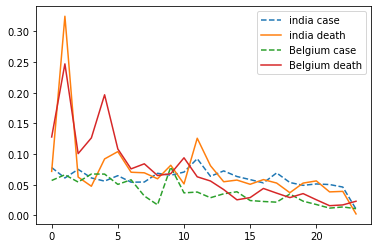

Canada


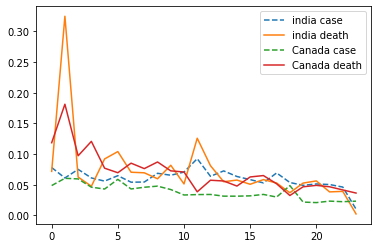

Netherlands


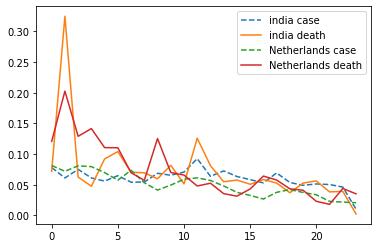

In [61]:
##MSE

### country2 = reference: china, korea, etc
### country 1 = benchmark = india

benchmark_every_country = {}
#iterate thru every country that have available data
for k,country2_rate in country_dict_confirm_cases_rate.items():
    country_result_list = []
    # map each country rog at everything period possible
    for i in range(len(country2_rate)-len(data_country_1_confirm_cases_rog)):
        #First = reference, second-> benchmark
        first_data = data_country_1_confirm_cases_rog
        second_data = country2_rate[i:i+len(data_country_1_confirm_cases_rog)]
        country_result_list.append(mse(first_data,second_data))
        sim =  mse(first_data,second_data)
        ## plot best/worst country
        if (sim < 0.00252):
            print(k)
            #print(sim)
            plt.plot(first_data[:,0], '--' , label = "india case")
            plt.plot(first_data[:,1], label = "india death")
            plt.plot(second_data[:,0], '--' , label = k + " case")
            plt.plot(second_data[:,1], label = k + " death")
            plt.legend()
            plt.show()
        
    benchmark_every_country[k] = country_result_list

Find max similarity between indian and every other country

In [62]:
max_similarity_by_country = {}
for country, similarity in benchmark_every_country.items():
    pos_score_list = []
    if len(similarity) > 0:
        pos_score_list.append(np.argmax(similarity))
        pos_score_list.append(similarity[np.argmax(similarity)])
        max_similarity_by_country[country] = pos_score_list

In [63]:
max_similarity_by_country

{'Algeria': [11, 0.007390684381591268],
 'Austria': [14, 0.010530627321614838],
 'Belgium': [0, 0.014870632984199548],
 'Brazil': [0, 0.009827031690411502],
 'Canada': [0, 0.004946577980790207],
 'China': [53, 0.018286226036312123],
 'Denmark': [12, 0.008482036818679409],
 'Dominican Republic': [0, 0.00617085772174991],
 'Ecuador': [2, 0.059107074993174274],
 'Egypt': [3, 0.006814907849762337],
 'France': [0, 0.031208441506264038],
 'Germany': [0, 0.009622022610128544],
 'Hungary': [0, 0.007841384312385475],
 'Indonesia': [12, 0.0067477238274216865],
 'Iran': [42, 0.009369701007967426],
 'Ireland': [13, 0.008611579560111153],
 'Italy': [0, 0.03276990299658749],
 'Mexico': [0, 0.007435688076375679],
 'Netherlands': [0, 0.009434394791072014],
 'Peru': [0, 0.005396243603529897],
 'Philippines': [11, 0.00714090593004818],
 'Poland': [9, 0.005861846431389144],
 'Portugal': [18, 0.00847941515746162],
 'Romania': [10, 0.005749682666078605],
 'Russia': [0, 0.004519886151228902],
 'South Korea'

Find top X country for MSE method

In [64]:
sorted(max_similarity_by_country, key=lambda x: (max_similarity_by_country[x][1]),reverse=True)

['Ecuador',
 'United States',
 'Spain',
 'Italy',
 'France',
 'United Kingdom',
 'China',
 'Belgium',
 'World',
 'South Korea',
 'Austria',
 'Switzerland',
 'Brazil',
 'Germany',
 'Netherlands',
 'Iran',
 'Ireland',
 'Denmark',
 'Portugal',
 'Hungary',
 'Mexico',
 'Algeria',
 'Philippines',
 'Sweden',
 'Egypt',
 'Indonesia',
 'Turkey',
 'Dominican Republic',
 'Poland',
 'Romania',
 'Peru',
 'Canada',
 'Russia']

Applying cosine similarity method to the whole dataset

In [101]:
country_dict_confirm_cases = {}
data_country_1_confirm_cases = np.array(data_country_1[["total_cases"]])

In [102]:
country_list = data_country_other["location"].unique()

In [103]:
for country in country_list:
    temp = data_country_other[data_country_other["location"] == country]
    country_dict_confirm_cases[country] = np.array(temp[["total_cases"]])

In [104]:
country_dict_confirm_cases_rate = {}

In [105]:
for k, v in country_dict_confirm_cases.items():
    country_dict_confirm_cases_rate[k] = rog(v)
    
data_country_1_confirm_cases_rog = rog(data_country_1_confirm_cases)

Canada


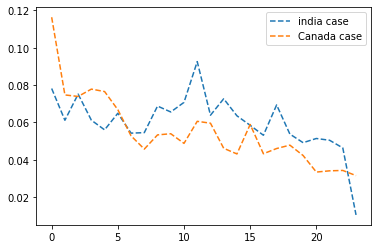

Canada


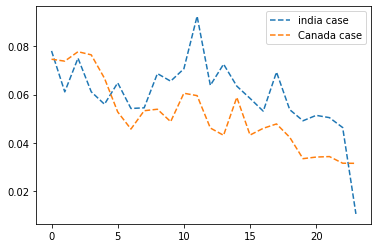

Canada


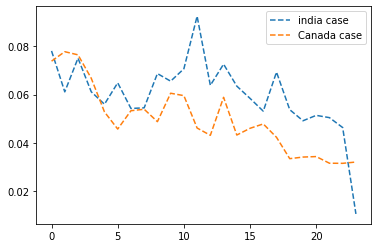

Canada


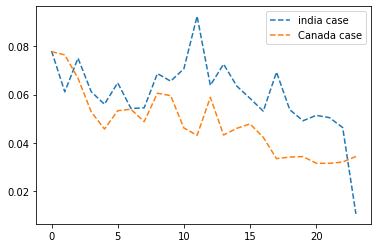

Canada


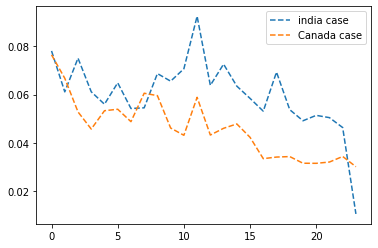

Netherlands


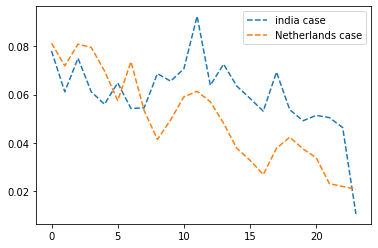

Russia


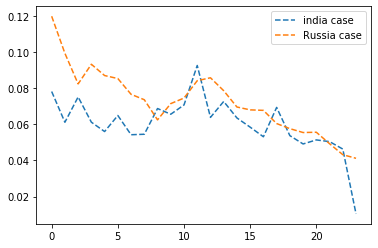

World


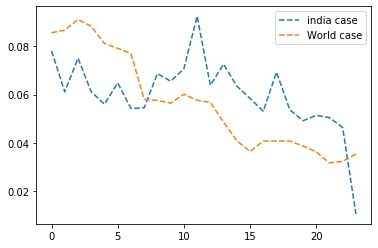

World


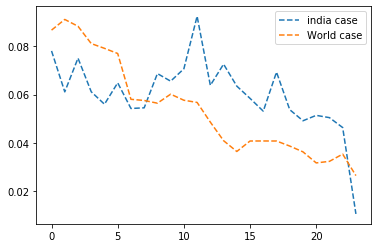

In [106]:
###cosine sim

### country2 = reference: china, korea, etc
### country 1 = benchmark = india

benchmark_every_country = {}
#iterate thru every country that have available data
for k,country2_rate in country_dict_confirm_cases_rate.items():
    country_result_list = []
    # map each country rog at everything period possible
    for i in range(len(country2_rate)-len(data_country_1_confirm_cases_rog)):
        #First = reference, second-> benchmark
        first_data = data_country_1_confirm_cases_rog
        second_data = country2_rate[i:i+len(data_country_1_confirm_cases_rog)]
        country_result_list.append(mse(first_data,second_data))
        sim =  mse(first_data,second_data)
        ## plot best/worst country
        if (sim < 0.00038):
            print(k)
            #print(sim)
            plt.plot(first_data, '--' , label = "india case")
            plt.plot(second_data, '--' , label = k + " case")
            plt.legend()
            plt.show()
        
    benchmark_every_country[k] = country_result_list

MSE performs much better as a benchmark country. Consine similarity find rog of graph that moves in the same direction but not directly overlap. Now, pick top 3 countries based on MSE method to use as a benchmark

In [107]:
new_cases = data_consolidated[['date','location','new_cases']]
new_deaths = data_consolidated[['date','location','new_deaths']]

In [108]:
location = ['Netherlands']

In [109]:
Netherlands = data_country_other[data_country_other['location']=='Netherlands'][6:]
Canada = data_country_other[data_country_other['location']=='Canada'][10:]
Belgium = data_country_other[data_country_other['location']=='Belgium'][10:]

In [38]:
Netherlands.shape

(48, 6)

In [110]:
def num_predictions(country):
    return len(country) - day_size

In [111]:


day_size = 5

X_mat = []
y_mat = []
for i in range(num_predictions(Netherlands)):
    # Slice a day_size of features
    X_mat.append(list(np.array(Netherlands[i:i + day_size]["total_cases"]))) 
    y_mat.append(list(np.array(Netherlands[i+day_size:i+day_size+1]["total_cases"])))
    
    
for i in range(num_predictions(Belgium)):
    X_mat.append(list(np.array(Belgium[i:i + day_size]["total_cases"])))
    y_mat.append(list(np.array(Belgium[i+day_size:i+day_size+1]["total_cases"])))
    

for i in range(num_predictions(Canada)):
    X_mat.append(list(np.array(Canada[i:i + day_size]["total_cases"])))
    y_mat.append(list(np.array(Canada[i+day_size:i+day_size+1]["total_cases"])))
    
    
    
X_mat = np.array(X_mat)
y_mat = np.array(y_mat)
print(X_mat.shape)
print(y_mat.shape)




reg = linear_model.HuberRegressor()
lr = reg.fit(X_mat, y_mat)
y_pred = lr.predict(X_mat)
r2_score(y_mat, y_pred)


(106, 5)
(106, 1)


C:\Users\v-krvibh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\v-krvibh\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9994902480723215

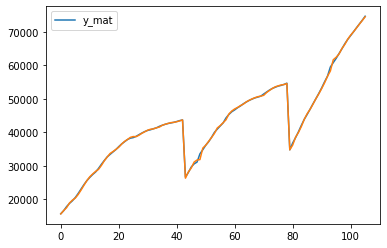

In [112]:
plt.plot(y_mat,label = 'y_mat')
plt.plot(y_pred)
plt.legend()

In [114]:
X = np.array(list(data_country_1["total_cases"]))

for i in range(45):
    X_pred = np.array(list(X[len(X)-day_size:len(X)]))
    y_pred = lr.predict(X_pred.reshape(1,5))
    X = np.append(X,y_pred)
    


In [115]:
X

array([ 21370.        ,  23039.        ,  24447.        ,  26283.        ,
        27890.        ,  29451.        ,  31361.        ,  33061.        ,
        34862.        ,  37257.        ,  39699.        ,  42505.        ,
        46437.        ,  49400.        ,  52987.        ,  56351.        ,
        59642.        ,  62808.        ,  67161.        ,  70768.        ,
        74243.        ,  78055.        ,  81989.        ,  85784.        ,
        86678.        ,  88666.23303689,  90674.49810682,  92757.43738499,
        94490.46663873,  96214.93213336,  97869.11239524,  99477.11041981,
       100990.49579798, 102437.17996983, 103814.29319423, 105127.40166407,
       106372.8859878 , 107554.08186437, 108671.93638922, 109728.36563531,
       110724.24688362, 111661.04014621, 112539.99144775, 113362.4473469 ,
       114129.63319447, 114842.8071121 , 115503.19171646, 116112.00591158,
       116670.44162541, 117179.67797012, 117640.87528848, 118055.17856905,
       118423.71520946, 1

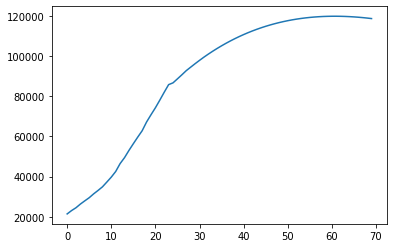

In [116]:
plt.plot(X)

In [117]:
X_series = pd.Series(X)

In [122]:
X_series.to_csv('predictions.csv')